In [7]:
import numpy as np
import numpy.random as rand
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

from matplotlib.pyplot import rcParams
rcParams['text.usetex'] = True

In [3]:
import networkx as nx
from scipy.special import beta as beta

In [4]:
flatten = lambda edges : np.array([e for es in edges for e in es]) if len(edges) > 0 else []
def select(v, P):
    index = -1
    while(v > 0):
        index +=1
        v -= P[index]
    return max(0, index)

# From Here, information about underlying clusters is random.

In [85]:
cits = 5
num_clusters=6
P = np.array(list(map(lambda ps: ps/sum(ps), rand.random((num_clusters,num_clusters)))))
tmp = rand.random((num_clusters,1))
C = tmp/sum(tmp)
a = 2
n = 200000

initial_nodes = 4

In [86]:
communities = list(map(list,np.reshape(np.arange(0,initial_nodes*num_clusters), (num_clusters,initial_nodes))))
community_edges = [[]]*num_clusters

G = nx.DiGraph()
for i, com in enumerate(communities):
    G.add_nodes_from(com, community=i)

for i, com in enumerate(communities):
    edges = [[(com[j], c) for c in com[j+1:]] for j in range(len(com))]
    G.add_edges_from(flatten(edges))
    community_edges[i].extend(flatten(edges))

for i, com in enumerate(communities[:-1]):
    G.add_edge(com[-1], communities[i+1][0])
    community_edges[i].append((com[-1],communities[i+1][0]))

In [87]:
for i in tqdm(range(initial_nodes*num_clusters,n)):
    r = rand.random()
    comm = select(r, C)
    communities[comm].append(i)
    G.add_node(i,community=comm)
    for k in range(cits):
        dest_node= i 
        r2 = rand.random()
        dest = select(r2, P[comm])
        while dest_node == i:
            if rand.random() < cits / (cits+a):
                edges = community_edges[comm]
                _, dest_node = edges[rand.randint(len(edges))]
            else:
                dest_node = rand.choice(communities[dest])
        G.add_edge(i, dest_node)
        community_edges[comm].append((i,dest_node))

In [95]:
b = max(list(map(G.in_degree, flatten(communities))))
n, k, _ = plt.hist(list(map(G.in_degree, flatten(communities))), bins=b)
proportion_in_degree = n/len(G)
cum_prop_in_degree = [sum(proportion_in_degree[i:]) for i in range(len(n))]


<IPython.core.display.Javascript object>


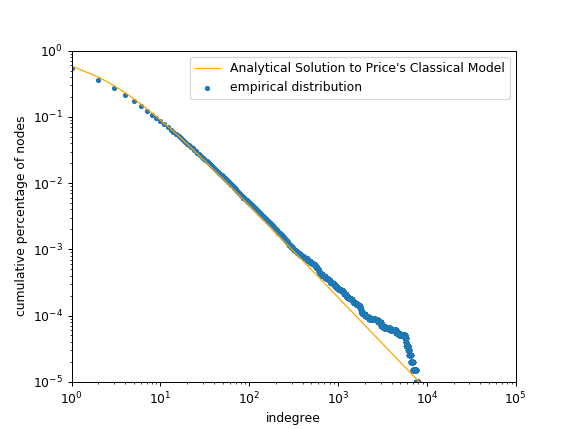

In [96]:
%matplotlib notebook
fig,ax = plt.subplots()
ax.plot(k[1:]-1, (beta(k[1:]-1+a, (cits+a)/cits)/beta(a, (cits+a)/cits)), c='orange', linewidth=1, label='Analytical Solution to Price\'s Classical Model')
ax.scatter(y=cum_prop_in_degree, x=k[1:]-1, s=10, label='empirical distribution')
plt.yscale('log')
plt.xscale('log')
ax.set_ylabel('cumulative percentage of nodes')
ax.set_xlabel('indegree')
plt.ylim(1/100000, 1)
plt.xlim(1,100000)
plt.legend()
plt.show()

# From here, information about underlying clusters is adversarial

In [33]:
cits = 5
num_clusters=6
P = np.array([[0.01,0.01,0.01,0.01,0.01,0.95]]*6)
C = np.array([0.99/5]*5+[0.01])
a = 2
n = 200000

initial_nodes = 4

In [36]:
communities2 = list(map(list,np.reshape(np.arange(0,initial_nodes*num_clusters), (num_clusters,initial_nodes))))
community_edges2 = [[]]*num_clusters

G2 = nx.DiGraph()
for i, com in enumerate(communities2):
    G2.add_nodes_from(com, community=i)

for i, com in enumerate(communities2):
    edges = [[(com[j], c) for c in com[j+1:]] for j in range(len(com))]
    G2.add_edges_from(flatten(edges))
    community_edges2[i].extend(flatten(edges))

for i, com in enumerate(communities2[:-1]):
    G2.add_edge(com[-1], communities[i+1][0])
    community_edges2[i].append((com[-1],communities[i+1][0]))

In [37]:
for i in tqdm(range(initial_nodes*num_clusters,n)):
    r = rand.random()
    comm = select(r, C)
    communities2[comm].append(i)
    G2.add_node(i,community=comm)
    for k in range(cits):
        dest_node= i 
        r2 = rand.random()
        dest = select(r2, P[comm])
        while dest_node == i:
            if rand.random() < cits / (cits+a):
                edges = community_edges2[comm]
                _, dest_node = edges[rand.randint(len(edges))]
            else:
                dest_node = rand.choice(communities2[dest])
        G2.add_edge(i, dest_node)
        community_edges2[comm].append((i,dest_node))

In [141]:
b2 = np.max(list(map(lambda l : max(list(map(G2.in_degree, l))), communities2)))
n2, k2, _ = plt.hist(list(map(G2.in_degree, flatten(communities2))), bins=b2)
proportion_in_degree2 = n2/len(G2)
cum_prop_in_degree2 = [sum(proportion_in_degree2[i:]) for i in range(len(n2))]


<IPython.core.display.Javascript object>


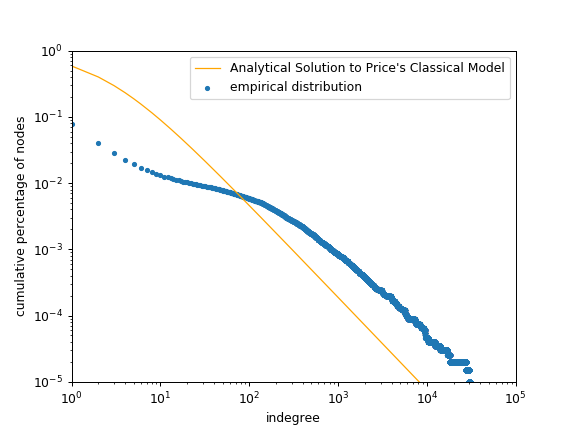

In [145]:
%matplotlib notebook
fig2,ax2 = plt.subplots()
ax2.plot(k2[1:]-1, (beta(k2[1:]-1+a, (cits+a)/cits)/beta(a, (cits+a)/cits)), c='orange', linewidth=1, label='Analytical Solution to Price\'s Classical Model')
ax2.scatter(y=cum_prop_in_degree2, x=k2[1:]-1, s=10, label='empirical distribution')
plt.yscale('log')
plt.xscale('log')
ax2.set_ylabel('cumulative percentage of nodes')
ax2.set_xlabel('indegree')
plt.ylim(1/100000, 1)
plt.xlim(1,100000)
plt.legend()
plt.show()

# From Here, information about underlying clusters is "reasonable"

In [90]:
cits = 5
num_clusters=6
P = np.array([
    [0.5, 0.1, 0.2, 0.05, 0.15, 0.1],
    [0.1, 0.4, 0.2, 0.15, 0.075, 0.075],
    [0.1, 0.1, 0.6, 0.1, 0.05, 0.05],
    [0.15, 0.2, 0.05, 0.4, 0.1, 0.1],
    [0.1, 0.05, 0.1, 0.1, 0.45, 0.2],
    [0.1,0.1,0.1,0.1,0.1,0.5]
])
C = np.array([0.2, 0.15, 0.25, 0.15, 0.1,0.15])
a = 2
n = 200000

initial_nodes = 4

In [91]:
communities3 = list(map(list,np.reshape(np.arange(0,initial_nodes*num_clusters), (num_clusters,initial_nodes))))
community_edges3 = [[]]*num_clusters

G3 = nx.DiGraph()
for i, com in enumerate(communities3):
    G3.add_nodes_from(com, community=i)

for i, com in enumerate(communities3):
    edges = [[(com[j], c) for c in com[j+1:]] for j in range(len(com))]
    G3.add_edges_from(flatten(edges))
    community_edges3[i].extend(flatten(edges))

for i, com in enumerate(communities3[:-1]):
    G3.add_edge(com[-1], communities[i+1][0])
    community_edges3[i].append((com[-1],communities[i+1][0]))

In [92]:
for i in tqdm(range(initial_nodes*num_clusters,n)):
    r = rand.random()
    comm = select(r, C)
    communities3[comm].append(i)
    G3.add_node(i,community=comm)
    for k in range(cits):
        dest_node= i 
        r3 = rand.random()
        dest = select(r3, P[comm])
        while dest_node == i:
            if rand.random() < cits / (cits+a):
                edges = community_edges3[comm]
                _, dest_node = edges[rand.randint(len(edges))]
            else:
                dest_node = rand.choice(communities3[dest])
        G3.add_edge(i, dest_node)
        community_edges3[comm].append((i,dest_node))

In [143]:
b3 = np.max(list(map(lambda l : max(list(map(G3.in_degree, l))), communities3)))
n3, k3, _ = plt.hist(list(map(G3.in_degree, flatten(communities3))), bins=b3)
proportion_in_degree3 = n3/len(G3)
cum_prop_in_degree3 = [sum(proportion_in_degree3[i:]) for i in range(len(n3))]


<IPython.core.display.Javascript object>


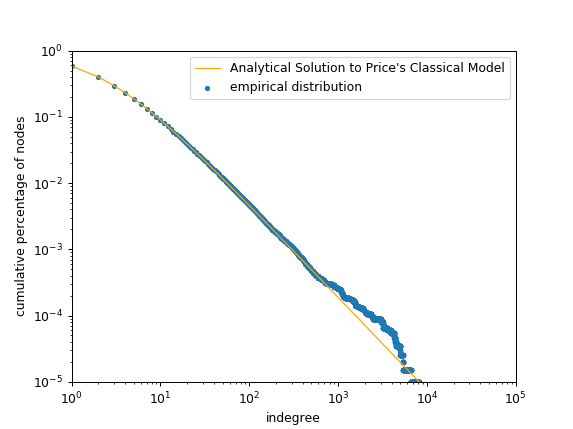

In [144]:
%matplotlib notebook
fig3,ax3 = plt.subplots()
ax3.plot(k3[1:]-1, (beta(k3[1:]-1+a, (cits+a)/cits)/beta(a, (cits+a)/cits)), c='orange', linewidth=1, label='Analytical Solution to Price\'s Classical Model')
ax3.scatter(y=cum_prop_in_degree3, x=k3[1:]-1, s=10, label='empirical distribution')
plt.yscale('log')
plt.xscale('log')
ax3.set_ylabel('cumulative percentage of nodes')
ax3.set_xlabel('indegree')
plt.ylim(1/100000, 1)
plt.xlim(1,100000)
plt.legend()
plt.show()

In [84]:
sum(C)

array([1.])

In [104]:
(beta(k2[1]-1+a, (cits+a)/cits)/beta(a, (cits+a)/cits))

0.3311706378205819

In [126]:
(np.max(list(map(lambda l : list(map(G2.in_degree, l)), (communities2)))))

[30847,
 29789,
 27438,
 34324,
 18072,
 14129,
 17013,
 12337,
 10374,
 9528,
 9160,
 9620,
 9607,
 8271,
 8640,
 7455,
 7318,
 7274,
 5675,
 5960,
 5638,
 6073,
 5856,
 5683,
 4798,
 4575,
 4611,
 4499,
 4812,
 4381,
 4315,
 3983,
 4013,
 4074,
 3676,
 3122,
 3995,
 3099,
 3312,
 2765,
 2812,
 3087,
 3281,
 3233,
 3412,
 2581,
 2635,
 2455,
 2501,
 2538,
 2593,
 2323,
 2397,
 2213,
 2409,
 2070,
 2317,
 2136,
 2244,
 1982,
 1929,
 2006,
 1945,
 2168,
 1793,
 1912,
 2017,
 2194,
 2298,
 1956,
 1721,
 2103,
 1865,
 1673,
 1841,
 1639,
 1674,
 1812,
 2070,
 1766,
 1646,
 1699,
 1742,
 1844,
 1583,
 1730,
 1478,
 1585,
 1591,
 1432,
 1641,
 1439,
 1557,
 1777,
 1704,
 1607,
 1521,
 1480,
 1402,
 1453,
 1478,
 1528,
 1528,
 1473,
 1285,
 1194,
 1363,
 1220,
 1318,
 1455,
 1357,
 1378,
 1327,
 1304,
 1344,
 1180,
 1218,
 1223,
 1285,
 1406,
 1198,
 1181,
 1230,
 1303,
 1316,
 1299,
 1242,
 1159,
 1179,
 1162,
 1104,
 1107,
 1073,
 1019,
 1218,
 1071,
 1007,
 942,
 1071,
 1025,
 1155,
 1026

In [140]:
np.max(list(map(lambda l : max(list(map(G2.in_degree, l))), communities2)))

34324

In [129]:
np.max([[1,2],[3,4]])

4

In [137]:
np.size(list(map(lambda l : list(map(G2.in_degree, l)), communities2[1])))

TypeError: 'numpy.int64' object is not iterable